In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from wordcloud import WordCloud
from stop_words import stop_bag
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# Import raw data

In [65]:
df = pd.read_csv("../data_acquisition/raw_data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

# Let's take a quick look at the first rows
print(df.shape)
df.head()

(3174, 28)


Employer        Time                                            Comment  \
0   adidas    Mai 2022                          adidas AG - Manager Level   
1   adidas    Mai 2022  Großer Konzern mit konservativen und veraltete...   
2   adidas    Mai 2022                 Super Campus aber intern politisch   
3   adidas  April 2022                      Große Marke, hohe Erwartungen   
4   adidas  April 2022                               außen hui innen pfui   

           Overall  Interessante Aufgaben  Gleichberechtigung  Kommunikation  \
0  Nicht empfohlen                    4.0                 4.0            4.0   
1  Nicht empfohlen                    1.0                 2.0            1.0   
2  Nicht empfohlen                    4.0                 1.0            2.0   
3        Empfohlen                    5.0                 5.0            4.0   
4  Nicht empfohlen                    3.0                 2.0            2.0   

   Arbeitsbedingungen  Vorgesetztenverhalten  Umgang mit älteren Kollegen  \
0                 4.0                    2.0                          2.0   
1                 3.0                    1.0                          2.0   
2                 3.0                    2.0                          1.0   
3                 4.0                    4.0                          2.0   
4                 4.0                    2.0                          2.0   

   ...  Variation  Spaßfaktor  Aufgaben/Tätigkeiten  Die Ausbilder  \
0  ...        NaN         NaN                   NaN            NaN   
1  ...        NaN         NaN                   NaN            NaN   
2  ...        NaN         NaN                   NaN            NaN   
3  ...        NaN         NaN                   NaN            NaN   
4  ...        NaN         NaN                   NaN            NaN   

   Ausbildungsvergütung  Arbeitszeiten  Karrierechancen  \
0                   NaN            NaN              NaN   
1                   NaN            NaN              NaN   
2                   NaN            NaN              NaN   
3                   NaN            NaN              NaN   
4                   NaN            NaN              NaN   

   Arbeitgeber-Kommentar  Herausforderung  Arbeitgeber-Kommentare  
0                    NaN              NaN                     NaN  
1                    NaN              NaN                     NaN  
2                    NaN              NaN                     NaN  
3                    NaN              NaN                     NaN  
4                    NaN              NaN                     NaN  

[5 rows x 28 columns]

# Basic data cleaning

In [66]:
# Show columns

df.columns

Index(['Employer', 'Time', 'Comment', 'Overall', 'Interessante Aufgaben',
       'Gleichberechtigung', 'Kommunikation', 'Arbeitsbedingungen',
       'Vorgesetztenverhalten', 'Umgang mit älteren Kollegen',
       'Kollegenzusammenhalt', 'Umwelt-/Sozialbewusstsein',
       'Gehalt/Sozialleistungen', 'Karriere/Weiterbildung',
       'Work-Life-Balance', 'Image', 'Arbeitsatmosphäre', 'Respekt',
       'Variation', 'Spaßfaktor', 'Aufgaben/Tätigkeiten', 'Die Ausbilder',
       'Ausbildungsvergütung', 'Arbeitszeiten', 'Karrierechancen',
       'Arbeitgeber-Kommentar', 'Herausforderung', 'Arbeitgeber-Kommentare'],
      dtype='object')

In [67]:
# Rename columns and translate to english

df = df.rename(columns={
    'Employer': "employer",
    'Time': "record_date",
    'Comment': "comment",
    'Overall': "overall_result",
    'Interessante Aufgaben': 'interesting_tasks', 
    'Gleichberechtigung': 'equality',
    'Kommunikation': "communication",
    'Arbeitsbedingungen': "working_conditions",
    'Vorgesetztenverhalten': "supervisor_behavior",
    'Umgang mit älteren Kollegen': "dealing_w_older_colleagues",
    'Kollegenzusammenhalt': "colleague_cohesion",
    'Umwelt-/Sozialbewusstsein': "environmental_social awareness",
    'Gehalt/Sozialleistungen': "salary_benefits",
    'Karriere/Weiterbildung': "career_training",
    'Work-Life-Balance': "work_life_balance",
    'Image': "image",
    'Arbeitsatmosphäre': "work_atmosphere",
    'Respekt': "respect",
    'Variation': "variation",
    'Spaßfaktor': "fun_factor",
    'Aufgaben/Tätigkeiten': "tasks",
    'Die Ausbilder': "trainer",
    'Ausbildungsvergütung': "apprenticeship_pay",
    'Arbeitszeiten': "working_hours",
    'Karrierechancen': "career_opportunities",
    'Arbeitgeber-Kommentar': "employer_comment",
    'Herausforderung': "challenge",
    'Arbeitgeber-Kommentare': "employer_comments"   
})

In [68]:
# Most of the columns are numeric, that's fine for now

df_types = df.dtypes
df_types

employer                 object
record_date              object
comment                  object
overall_result           object
interesting_tasks       float64
                         ...   
working_hours           float64
career_opportunities    float64
employer_comment        float64
challenge               float64
employer_comments       float64
Length: 28, dtype: object

In [69]:
# Quite a few columns have a lot of missing values. 

df_missing = df.isna().sum().sort_values(ascending=False)
print(df_missing)
print(df.shape)

challenge               3173
employer_comments       3172
career_opportunities    3063
working_hours           3056
trainer                 3056
                        ... 
colleague_cohesion       143
record_date                0
overall_result             0
comment                    0
employer                   0
Length: 28, dtype: int64
(3174, 28)


In [70]:
fig = px.bar(df_missing)
fig.show()

In [72]:
# Let's get rid of everything above 500 and see how many rows are left

drop_list = df_missing[df_missing > 500].index.to_list()
print(df.shape)

(3174, 28)


In [73]:
df = df.drop(drop_list, axis=1).reset_index(drop=True)
print(df.shape)

(3174, 16)


In [74]:
df.isna().sum().sort_values(ascending=False)

dealing_w_older_colleagues        265
environmental_social awareness    250
image                             228
career_training                   207
work_life_balance                 203
                                 ... 
colleague_cohesion                143
employer                            0
record_date                         0
comment                             0
overall_result                      0
Length: 16, dtype: int64

Empfohlen          0.664461
Nicht empfohlen    0.335539
Name: overall_result, dtype: float64


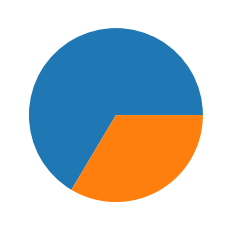

In [10]:
# The dataset (binary target variable) is inbalanced. 
# For a ML-modell (binary classification) this might have to be considered

targ = df.overall_result.value_counts(normalize=True)
print(targ)
plt.pie(x=targ)
plt.show()

In [11]:
# Let's translate the target column and check again for absolute value counts

df.overall_result.replace("Nicht empfohlen", "not_recommended", inplace=True)
df.overall_result.replace("Empfohlen", "recommended", inplace=True)

df.overall_result.value_counts()

recommended        2109
not_recommended    1065
Name: overall_result, dtype: int64

In [12]:
# Let's encode the overall result to 1s and 0s

encoder = LabelEncoder()
df["overall"] = encoder.fit_transform(df.overall_result)

In [13]:
# Uncomment to save DataFrame as .csv file in current working directory

# df.to_csv("kununu_cleaned_data.csv")

# Quick EDA

In [14]:
# Although we see numbers, these are ordinal categorical variables! 
# Users have rated each feature between 1 and 5 stars

# Optional styling parameters - append after "T" 
#.sort_values(by='mean' , ascending = False).style.background_gradient(cmap='GnBu').bar(subset=["std"], color='#F8766D').bar(subset=["count",], color='#00BFC4')


df.describe().T

count      mean       std  min  25%  50%  \
interesting_tasks               3008.0  3.750332  1.360214  1.0  3.0  4.0   
equality                        2973.0  3.744366  1.378761  1.0  3.0  4.0   
communication                   3027.0  3.390486  1.391415  1.0  2.0  4.0   
working_conditions              3005.0  3.677205  1.359840  1.0  3.0  4.0   
supervisor_behavior             3029.0  3.480687  1.493504  1.0  2.0  4.0   
dealing_w_older_colleagues      2909.0  3.919560  1.290796  1.0  3.0  4.0   
colleague_cohesion              3031.0  3.838007  1.292714  1.0  3.0  4.0   
environmental_social awareness  2924.0  3.677155  1.320803  1.0  3.0  4.0   
salary_benefits                 2985.0  3.624456  1.326419  1.0  3.0  4.0   
career_training                 2967.0  3.368049  1.431051  1.0  2.0  4.0   
work_life_balance               2971.0  3.610569  1.360881  1.0  3.0  4.0   
image                           2946.0  3.694162  1.343720  1.0  3.0  4.0   
overall                         3174.0  0.664461  0.472253  0.0  0.0  1.0   

                                75%  max  
interesting_tasks               5.0  5.0  
equality                        5.0  5.0  
communication                   5.0  5.0  
working_conditions              5.0  5.0  
supervisor_behavior             5.0  5.0  
dealing_w_older_colleagues      5.0  5.0  
colleague_cohesion              5.0  5.0  
environmental_social awareness  5.0  5.0  
salary_benefits                 5.0  5.0  
career_training                 5.0  5.0  
work_life_balance               5.0  5.0  
image                           5.0  5.0  
overall                         1.0  1.0

In [15]:
# Although rating each employer is not the goal here, it is still interesting to see...
# Change parameter from "10" to "None" to see all rows


pd.set_option('display.max_rows', 10)
df.groupby("employer").overall_result.value_counts(normalize=True)

employer    overall_result 
adidas      recommended        0.700000
            not_recommended    0.300000
airbus      recommended        0.644444
            not_recommended    0.355556
allianz118  recommended        0.545455
                                 ...   
volkswagen  not_recommended    0.211111
vonovia-se  not_recommended    0.511111
            recommended        0.488889
zalando     not_recommended    0.533333
            recommended        0.466667
Name: overall_result, Length: 77, dtype: float64

In [16]:
# We need to be careful, as not all employers have enough representative data here...

df.groupby("employer").overall_result.count()

employer
adidas        90
airbus        90
allianz118    11
basf-se       90
bayer         90
              ..
siemens       90
symrise       85
volkswagen    90
vonovia-se    90
zalando       90
Name: overall_result, Length: 39, dtype: int64

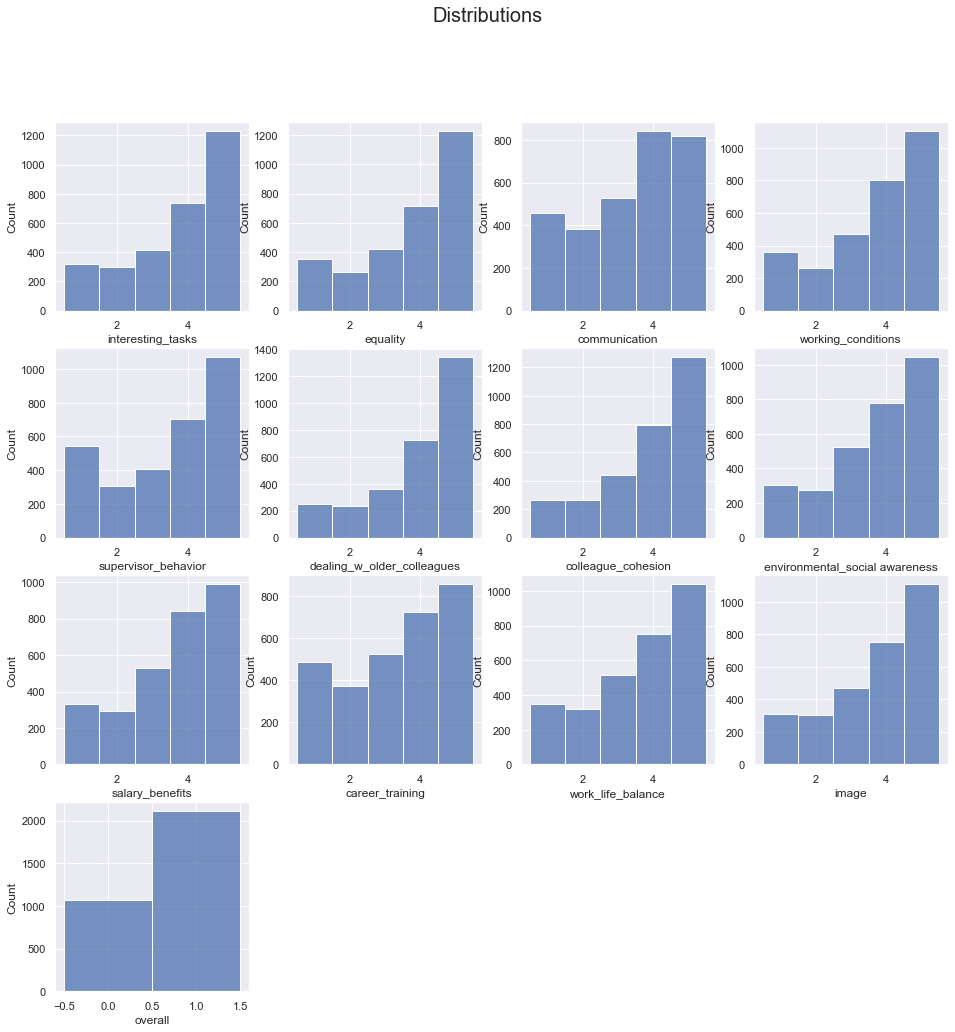

In [17]:
# Let's take a look at the distributions... 

# All features are asymmetrical / left-skewed (negative skew -> thicker left tail and mode>median>mean)
# People tend to give higher scores for each feature. Can that really be the case?
# In almost all cases the score 2 is the least frequent score. Why is that?

numerical_columns = df.select_dtypes("number").columns

sns.set(style="darkgrid")

plt.figure(figsize=(16, 16))
for i, f in enumerate(numerical_columns):
    plt.subplot(4,4,i+1)
    sns.histplot(data=df[f], bins=5, discrete=True)
plt.suptitle("Distributions", fontsize=20)
plt.show() 
plt.close()

In [18]:
df_fig = df[numerical_columns]
fig = px.box(df_fig, x=df_fig.columns)
fig.show()

In [19]:
# Calculating the skewness...

print(df[numerical_columns].skew().sort_values())

dealing_w_older_colleagues   -1.026147
colleague_cohesion           -0.906761
equality                     -0.814909
interesting_tasks            -0.802789
working_conditions           -0.755313
                                ...   
salary_benefits              -0.684297
work_life_balance            -0.639729
supervisor_behavior          -0.541460
communication                -0.453607
career_training              -0.408521
Length: 13, dtype: float64


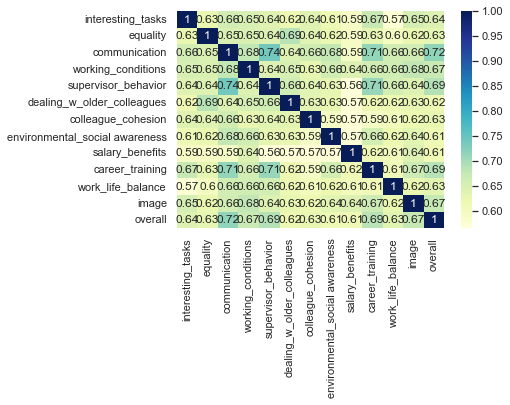

In [20]:
# ...and the correlations of the features

# There is a high positive correlation between all features
# That could be a problem for ML-Models...need to try I guess

_ = sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="YlGnBu")

In [21]:
# Same heatmap with plotly express

fig = px.imshow(df[numerical_columns].corr(), text_auto=True, aspect="auto")
fig.show()

In [22]:
# Can we get any insights/patterns from the less correlated features wrt overall recommendation?
# No, not really...
df_fig = df[["salary_benefits", "supervisor_behavior", "overall"]]
fig = px.parallel_coordinates(df_fig,color="overall", color_continuous_scale=px.colors.sequential.Inferno)
print(df_fig.shape)
fig.show()

(3174, 3)


In [23]:
# Feature ratings from 3 up result in positive recommendations. No big surprise.

fig = px.scatter(df_fig, x=df_fig.salary_benefits, y=df_fig.supervisor_behavior, color=df_fig.overall)
fig.show()

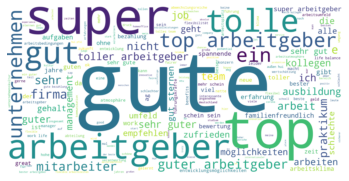

In [24]:
# Let's create a simple wordcloud for "fun" from the comments column

stop_words = stop_bag.split("\n")
word_list = ",".join(df.comment.to_list())
word_list = word_list.lower().split(" ")
comments_cleaned = [word for word in word_list if word not in stop_words]
comments_cleaned = ",".join(comments_cleaned)

wordcloud = WordCloud(width=2000, height=1000, margin=0, background_color='white').generate(comments_cleaned)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# That looks quite positive...(did not translate to english, as this column will not be included the model)
# But remember: The dataset is unbalanced wrt the overall result

In [25]:
# A simple and quick way to get an overview is the pandas Profile Report

profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]